In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
deliveries_df = pd.read_csv("/content/deliveries_updated_mens_ipl_upto_2024.csv")
matches_df = pd.read_csv("/content/matches_updated_mens_ipl_upto_2024.csv")


In [ ]:
deliveries_df.head()
matches_df.head()


,eliminator,team1,neutralvenue,balls_per_over,umpire2,umpire1,outcome,venue,date1,date2,...,city,winner,match_number,event,gender,match_referee,tv_umpire,toss_winner,toss_decision,matchId
0,NaN,Royal Challengers Bangalore,NaN,6,RE Koertzen,Asad Rauf,NaN,M Chinnaswamy Stadium,NaN,NaN,...,Bangalore,Kolkata Knight Riders,1.0,Indian Premier League,male,J Srinath,AM Saheba,Royal Challengers Bangalore,field,335982
1,NaN,Kings XI Punjab,NaN,6,SL Shastri,MR Benson,NaN,"Punjab Cricket Association Stadium, Mohali",NaN,NaN,...,Chandigarh,Chennai Super Kings,2.0,Indian Premier League,male,S Venkataraghavan,RB Tiffin,Chennai Super Kings,bat,335983
2,NaN,Delhi Daredevils,NaN,6,GA Pratapkumar,Aleem Dar,NaN,Feroz Shah Kotla,NaN,NaN,...,Delhi,Delhi Daredevils,3.0,Indian Premier League,male,GR Viswanath,IL Howell,Rajasthan Royals,bat,335984
3,NaN,Mumbai Indians,NaN,6,DJ Harper,SJ Davis,NaN,Wankhede Stadium,NaN,NaN,...,Mumbai,Royal Challengers Bangalore,5.0,Indian Premier League,male,J Srinath,AV Jayaprakash,Mumbai Indians,bat,335985
4,NaN,Kolkata Knight Riders,NaN,6,K Hariharan,BF Bowden,NaN,Eden Gardens,NaN,NaN,...,Kolkata,Kolkata Knight Riders,4.0,Indian Premier League,male,FM Engineer,Asad Rauf,Deccan Chargers,bat,335986


In [ ]:
print("Deliveries Data Info:\n")
deliveries_df.info()

print("\nMatches Data Info:\n")
matches_df.info()


Deliveries Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            8381 non-null    float64
 13  isNoBall          1093 non-null    float64
 14  Byes              673 non-null     float64
 15  LegByes           4001 non-null    float64
 1

In [ ]:
print("Deliveries dataset shape:", deliveries_df.shape)
print("Matches dataset shape:", matches_df.shape)


Deliveries dataset shape: (260920, 20)
Matches dataset shape: (1095, 28)


In [ ]:
print("Missing values in deliveries data:\n", deliveries_df.isna().sum())

print("\nMissing values in matches data:\n", matches_df.isna().sum())


Missing values in deliveries data:
 matchId                  0
inning                   0
over_ball                0
over                     0
ball                     0
batting_team             0
bowling_team             0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extras                   0
isWide              252539
isNoBall            259827
Byes                260247
LegByes             256919
Penalty             260918
dismissal_kind      247970
player_dismissed    247970
date                     0
dtype: int64

Missing values in matches data:
 eliminator         1081
team1                 0
neutralvenue       1018
balls_per_over        0
umpire2               0
umpire1               0
outcome            1076
venue                 0
date1              1093
date2              1093
method             1077
date                  0
team2                 0
player_of_match       5
winner_wickets      517
winner_runs      

In [ ]:
print("\nUnique players =", deliveries_df['batter'].nunique() if 'batter' in deliveries_df.columns else deliveries_df['batsman'].nunique())
print("Unique bowlers =", deliveries_df['bowler'].nunique())
print("Unique venues =", matches_df['venue'].nunique())
print("Unique teams =", matches_df['team1'].nunique())



Unique players = 674
Unique bowlers = 531
Unique venues = 58
Unique teams = 19


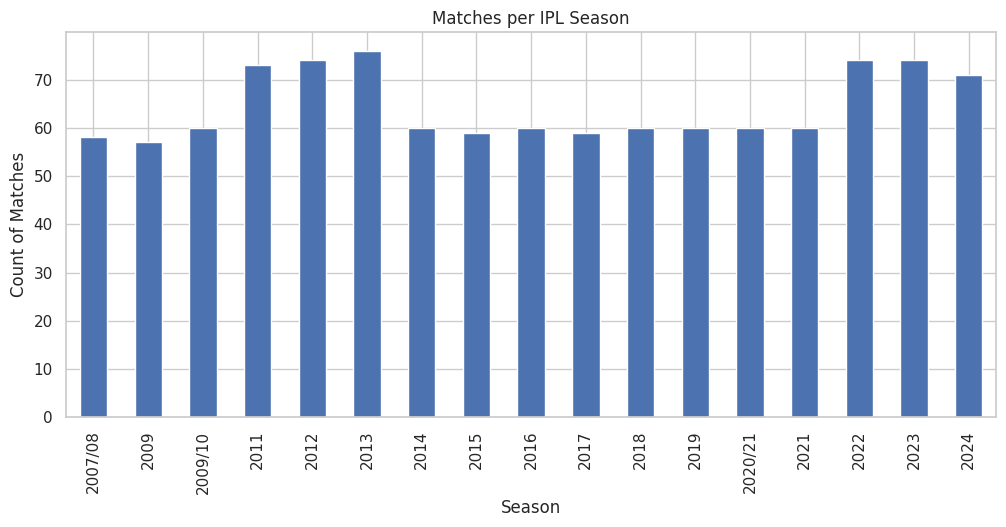

In [ ]:
plt.figure(figsize=(12,5))
matches_df['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Matches per IPL Season")
plt.xlabel("Season")
plt.ylabel("Count of Matches")
plt.show()


In [ ]:
deliveries_df.columns
matches_df.columns


Index(['eliminator', 'team1', 'neutralvenue', 'balls_per_over', 'umpire2',
       'umpire1', 'outcome', 'venue', 'date1', 'date2', 'method', 'date',
       'team2', 'player_of_match', 'winner_wickets', 'winner_runs',
       'reserve_umpire', 'season', 'city', 'winner', 'match_number', 'event',
       'gender', 'match_referee', 'tv_umpire', 'toss_winner', 'toss_decision',
       'matchId'],
      dtype='object')

In [ ]:
deliveries_df.columns.tolist()


['matchId',
 'inning',
 'over_ball',
 'over',
 'ball',
 'batting_team',
 'bowling_team',
 'batsman',
 'non_striker',
 'bowler',
 'batsman_runs',
 'extras',
 'isWide',
 'isNoBall',
 'Byes',
 'LegByes',
 'Penalty',
 'dismissal_kind',
 'player_dismissed',
 'date']

In [ ]:
# Create batting summary per match
batting_summary = (
    deliveries_df.groupby(['matchId', 'batsman'], as_index=False)['batsman_runs']
    .sum()
    .rename(columns={'batsman_runs': 'runs_in_match'})
)

batting_summary.head()


,matchId,batsman,runs_in_match
0,335982,AA Noffke,9
1,335982,B Akhil,0
2,335982,BB McCullum,158
3,335982,CL White,6
4,335982,DJ Hussey,12


In [ ]:
bowling_data = deliveries_df[
    (deliveries_df['player_dismissed'].notna()) &
    (deliveries_df['dismissal_kind'] != 'run out')
]

bowling_summary = (
    bowling_data.groupby(['matchId', 'bowler'], as_index=False)
    .size()
    .rename(columns={'size': 'wickets_in_match'})
)

bowling_summary.head()


,matchId,bowler,wickets_in_match
0,335982,AA Noffke,1
1,335982,AB Agarkar,3
2,335982,AB Dinda,2
3,335982,I Sharma,1
4,335982,JH Kallis,1


In [ ]:
matches_trimmed = matches_df[['matchId', 'season', 'venue', 'team1', 'team2', 'date']]
matches_trimmed.head()


,matchId,season,venue,team1,team2,date
0,335982,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
1,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,2008-04-19
2,335984,2007/08,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,2008-04-19
3,335985,2007/08,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,2008-04-20
4,335986,2007/08,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,2008-04-20


In [ ]:
batting_final = batting_summary.merge(matches_trimmed, on='matchId', how='left')
batting_final.head()


,matchId,batsman,runs_in_match,season,venue,team1,team2,date
0,335982,AA Noffke,9,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
1,335982,B Akhil,0,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
2,335982,BB McCullum,158,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
3,335982,CL White,6,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
4,335982,DJ Hussey,12,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18


In [ ]:
bowling_final = bowling_summary.merge(matches_trimmed, on='matchId', how='left')
bowling_final.head()


,matchId,bowler,wickets_in_match,season,venue,team1,team2,date
0,335982,AA Noffke,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
1,335982,AB Agarkar,3,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
2,335982,AB Dinda,2,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
3,335982,I Sharma,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18
4,335982,JH Kallis,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18


In [ ]:
team_map_bat = deliveries_df[['matchId', 'batsman', 'batting_team']].drop_duplicates()

batting_final = batting_final.merge(team_map_bat, on=['matchId', 'batsman'], how='left')

batting_final['opponent_team'] = batting_final.apply(
    lambda row: row['team2'] if row['batting_team'] == row['team1'] else row['team1'],
    axis=1
)

batting_final.head()


,matchId,batsman,runs_in_match,season,venue,team1,team2,date,batting_team,opponent_team
0,335982,AA Noffke,9,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,B Akhil,0,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,BB McCullum,158,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,CL White,6,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,DJ Hussey,12,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
team_map_bowl = deliveries_df[['matchId', 'bowler', 'bowling_team']].drop_duplicates()

bowling_final = bowling_final.merge(team_map_bowl, on=['matchId', 'bowler'], how='left')

bowling_final['opponent_team'] = bowling_final.apply(
    lambda row: row['team2'] if row['bowling_team'] == row['team1'] else row['team1'],
    axis=1
)

bowling_final.head()


,matchId,bowler,wickets_in_match,season,venue,team1,team2,date,bowling_team,opponent_team
0,335982,AA Noffke,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,AB Agarkar,3,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,AB Dinda,2,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,I Sharma,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,JH Kallis,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders


In [ ]:
batting_final.to_csv("batting_player_match_summary.csv", index=False)
bowling_final.to_csv("bowling_player_match_summary.csv", index=False)


In [ ]:
batting_final.head()


,matchId,batsman,runs_in_match,season,venue,team1,team2,date,batting_team,opponent_team
0,335982,AA Noffke,9,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,B Akhil,0,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,BB McCullum,158,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,CL White,6,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,DJ Hussey,12,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
bowling_final.head()


,matchId,bowler,wickets_in_match,season,venue,team1,team2,date,bowling_team,opponent_team
0,335982,AA Noffke,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,AB Agarkar,3,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,AB Dinda,2,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,I Sharma,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,JH Kallis,1,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders


In [ ]:
batting_final['date'] = pd.to_datetime(batting_final['date'])
batting_final = batting_final.sort_values(by=['batsman', 'date'])


In [ ]:
bowling_final['date'] = pd.to_datetime(bowling_final['date'])
bowling_final = bowling_final.sort_values(by=['bowler', 'date'])


In [ ]:
batting_final['avg_last_3'] = batting_final.groupby('batsman')['runs_in_match'].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
batting_final['avg_last_5'] = batting_final.groupby('batsman')['runs_in_match'].rolling(5, min_periods=1).mean().reset_index(level=0, drop=True)
batting_final['avg_last_10'] = batting_final.groupby('batsman')['runs_in_match'].rolling(10, min_periods=1).mean().reset_index(level=0, drop=True)


In [ ]:
bowling_final['avg_last_3'] = bowling_final.groupby('bowler')['wickets_in_match'].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
bowling_final['avg_last_5'] = bowling_final.groupby('bowler')['wickets_in_match'].rolling(5, min_periods=1).mean().reset_index(level=0, drop=True)
bowling_final['avg_last_10'] = bowling_final.groupby('bowler')['wickets_in_match'].rolling(10, min_periods=1).mean().reset_index(level=0, drop=True)


In [ ]:
batting_final['avg_at_venue'] = (
    batting_final.groupby(['batsman', 'venue'])['runs_in_match']
    .transform('mean')
)


In [ ]:
bowling_final['avg_at_venue'] = (
    bowling_final.groupby(['bowler', 'venue'])['wickets_in_match']
    .transform('mean')
)


In [ ]:
batting_final['avg_vs_opponent'] = (
    batting_final.groupby(['batsman', 'opponent_team'])['runs_in_match']
    .transform('mean')
)


In [ ]:
bowling_final['avg_vs_opponent'] = (
    bowling_final.groupby(['bowler', 'opponent_team'])['wickets_in_match']
    .transform('mean')
)


In [ ]:
batting_final['career_avg'] = batting_final.groupby('batsman')['runs_in_match'].transform('mean')


In [ ]:
bowling_final['career_avg'] = bowling_final.groupby('bowler')['wickets_in_match'].transform('mean')


In [ ]:
batting_final.head()
bowling_final.head()


,matchId,bowler,wickets_in_match,season,venue,team1,team2,date,bowling_team,opponent_team,avg_last_3,avg_last_5,avg_last_10,avg_at_venue,avg_vs_opponent,career_avg
1856,548341,A Ashish Reddy,2,2012,Subrata Roy Sahara Stadium,Pune Warriors,Deccan Chargers,2012-04-26,Deccan Chargers,Pune Warriors,2.000000,2.000000,2.000000,2.0,1.333333,1.285714
1891,548346,A Ashish Reddy,1,2012,Wankhede Stadium,Mumbai Indians,Deccan Chargers,2012-04-29,Deccan Chargers,Mumbai Indians,1.500000,1.500000,1.500000,1.0,1.000000,1.285714
1906,548348,A Ashish Reddy,1,2012,Barabati Stadium,Deccan Chargers,Pune Warriors,2012-05-01,Deccan Chargers,Pune Warriors,1.333333,1.333333,1.333333,1.0,1.333333,1.285714
1932,548352,A Ashish Reddy,1,2012,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Deccan Chargers,2012-05-04,Deccan Chargers,Chennai Super Kings,1.000000,1.250000,1.250000,1.0,1.000000,1.285714
1962,548356,A Ashish Reddy,1,2012,M Chinnaswamy Stadium,Royal Challengers Bangalore,Deccan Chargers,2012-05-06,Deccan Chargers,Royal Challengers Bangalore,1.000000,1.200000,1.200000,1.0,1.500000,1.285714


In [ ]:
batting_final.to_csv("batting_feature_engineered.csv", index=False)
bowling_final.to_csv("bowling_feature_engineered.csv", index=False)


In [ ]:
batting_df = batting_final.copy()

# Show schema
batting_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16515 entries, 4299 to 9452
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   matchId          16515 non-null  int64         
 1   batsman          16515 non-null  object        
 2   runs_in_match    16515 non-null  int64         
 3   season           16515 non-null  object        
 4   venue            16515 non-null  object        
 5   team1            16515 non-null  object        
 6   team2            16515 non-null  object        
 7   date             16515 non-null  datetime64[ns]
 8   batting_team     16515 non-null  object        
 9   opponent_team    16515 non-null  object        
 10  avg_last_3       16515 non-null  float64       
 11  avg_last_5       16515 non-null  float64       
 12  avg_last_10      16515 non-null  float64       
 13  avg_at_venue     16515 non-null  float64       
 14  avg_vs_opponent  16515 non-null  float64 

In [ ]:
batting_df.isna().sum()


,0
matchId,0
batsman,0
runs_in_match,0
season,0
venue,0
team1,0
team2,0
date,0
batting_team,0
opponent_team,0


In [ ]:
batting_df.duplicated().sum()


np.int64(0)

In [ ]:
batting_df.describe()


,matchId,runs_in_match,date,avg_last_3,avg_last_5,avg_last_10,avg_at_venue,avg_vs_opponent,career_avg
count,1.651500e+04,16515.000000,16515,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000
mean,9.078626e+05,19.985710,2016-07-13 12:29:15.204359424,20.057463,20.111980,20.160355,19.985710,19.985710,19.985710
min,3.359820e+05,0.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483310e+05,4.000000,2012-04-21 00:00:00,8.666667,10.200000,11.700000,9.000000,11.000000,14.100000
50%,9.809710e+05,13.000000,2016-05-07 00:00:00,17.333333,18.500000,19.700000,18.800000,20.000000,21.058824
75%,1.254071e+06,29.000000,2021-04-21 00:00:00,28.333333,28.000000,27.400000,28.304348,27.064516,26.440367
max,1.426312e+06,175.000000,2024-05-26 00:00:00,158.000000,158.000000,158.000000,114.000000,120.000000,69.000000
std,3.696686e+05,21.360857,NaN,14.469059,12.772647,11.346696,13.946806,12.001922,8.920729


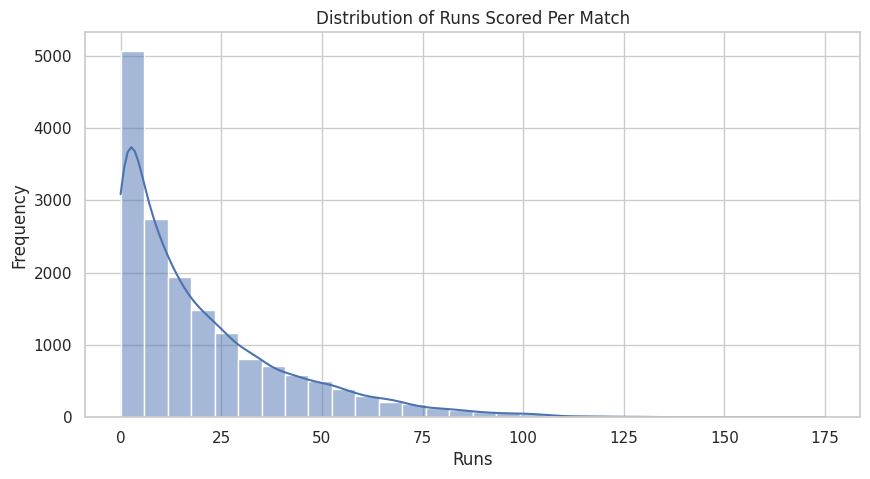

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(batting_df['runs_in_match'], bins=30, kde=True)
plt.title("Distribution of Runs Scored Per Match")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


In [ ]:
batting_df['venue'].value_counts().head(10)


,count
venue,
Eden Gardens,1131
Wankhede Stadium,1123
M Chinnaswamy Stadium,959
Feroz Shah Kotla,896
"Rajiv Gandhi International Stadium, Uppal",723
"MA Chidambaram Stadium, Chepauk",720
Dubai International Cricket Stadium,684
"Wankhede Stadium, Mumbai",682
Sawai Mansingh Stadium,679


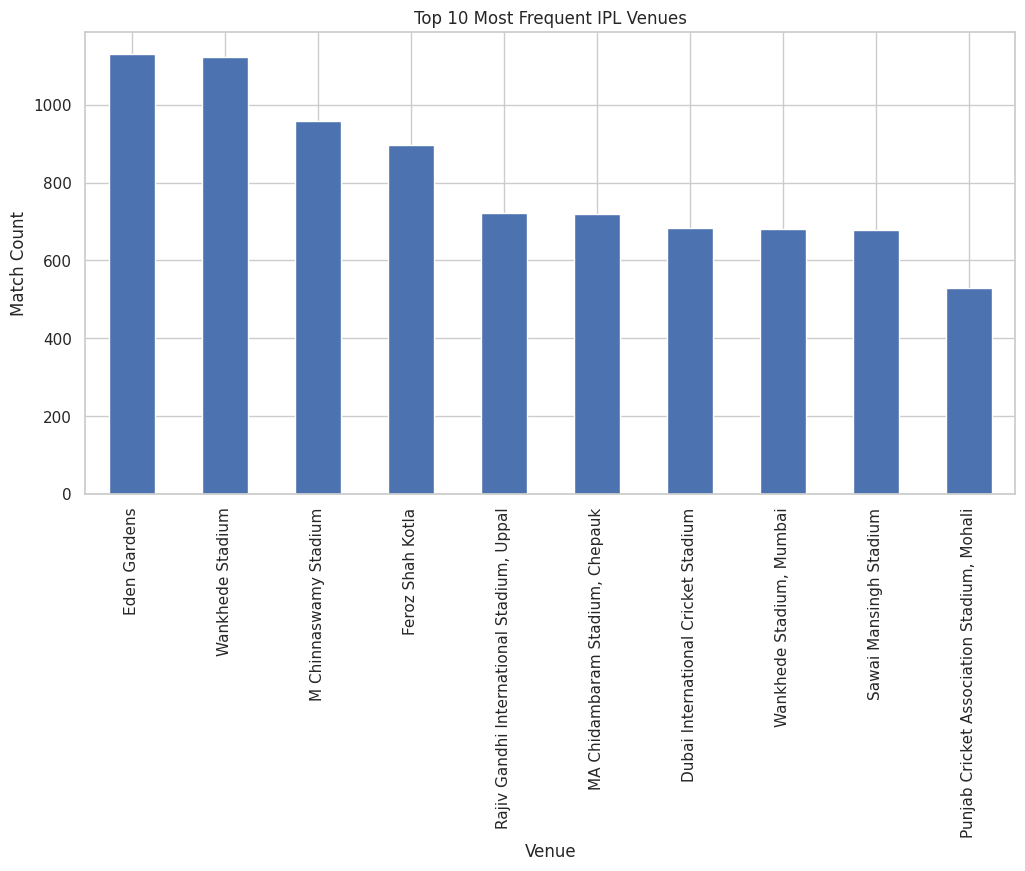

In [ ]:
plt.figure(figsize=(12,6))
batting_df['venue'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent IPL Venues")
plt.xlabel("Venue")
plt.ylabel("Match Count")
plt.show()


In [ ]:
sorted(batting_df['batting_team'].unique())


['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Royal Challengers Bengaluru',
 'Sunrisers Hyderabad']

In [ ]:
team_mapping = {
    "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    "Kings XI Punjab": "Punjab Kings",
    "Delhi Daredevils": "Delhi Capitals",
    "Rising Pune Supergiant": "Rising Pune Supergiants"
}


In [ ]:
batting_df['batting_team'] = batting_df['batting_team'].replace(team_mapping)
batting_df['opponent_team'] = batting_df['opponent_team'].replace(team_mapping)


In [ ]:
sorted(batting_df['batting_team'].unique())


['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bengaluru',
 'Sunrisers Hyderabad']

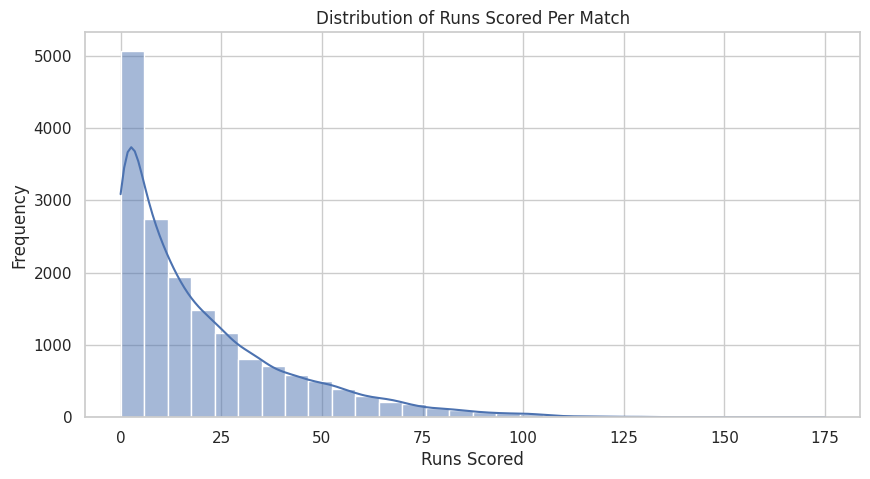

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(batting_df['runs_in_match'], bins=30, kde=True)
plt.title("Distribution of Runs Scored Per Match")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()


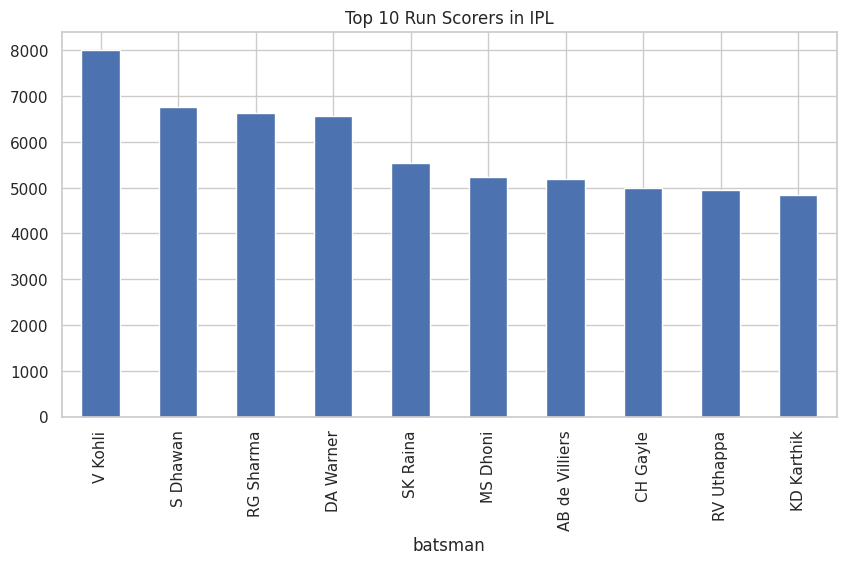

In [ ]:
top_batsmen = batting_df.groupby('batsman')['runs_in_match'].sum().sort_values(ascending=False).head(10)
top_batsmen.plot(kind='bar', figsize=(10,5), title="Top 10 Run Scorers in IPL")
plt.show()


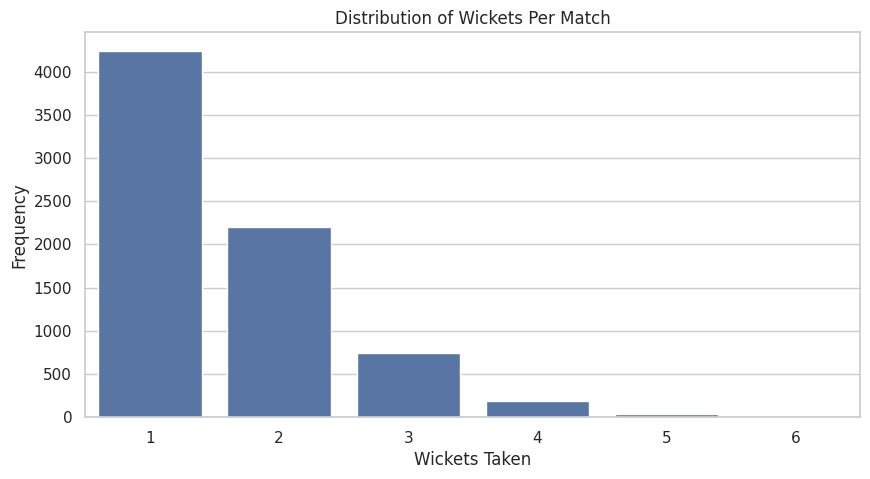

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='wickets_in_match', data=bowling_final)
plt.title("Distribution of Wickets Per Match")
plt.xlabel("Wickets Taken")
plt.ylabel("Frequency")
plt.show()


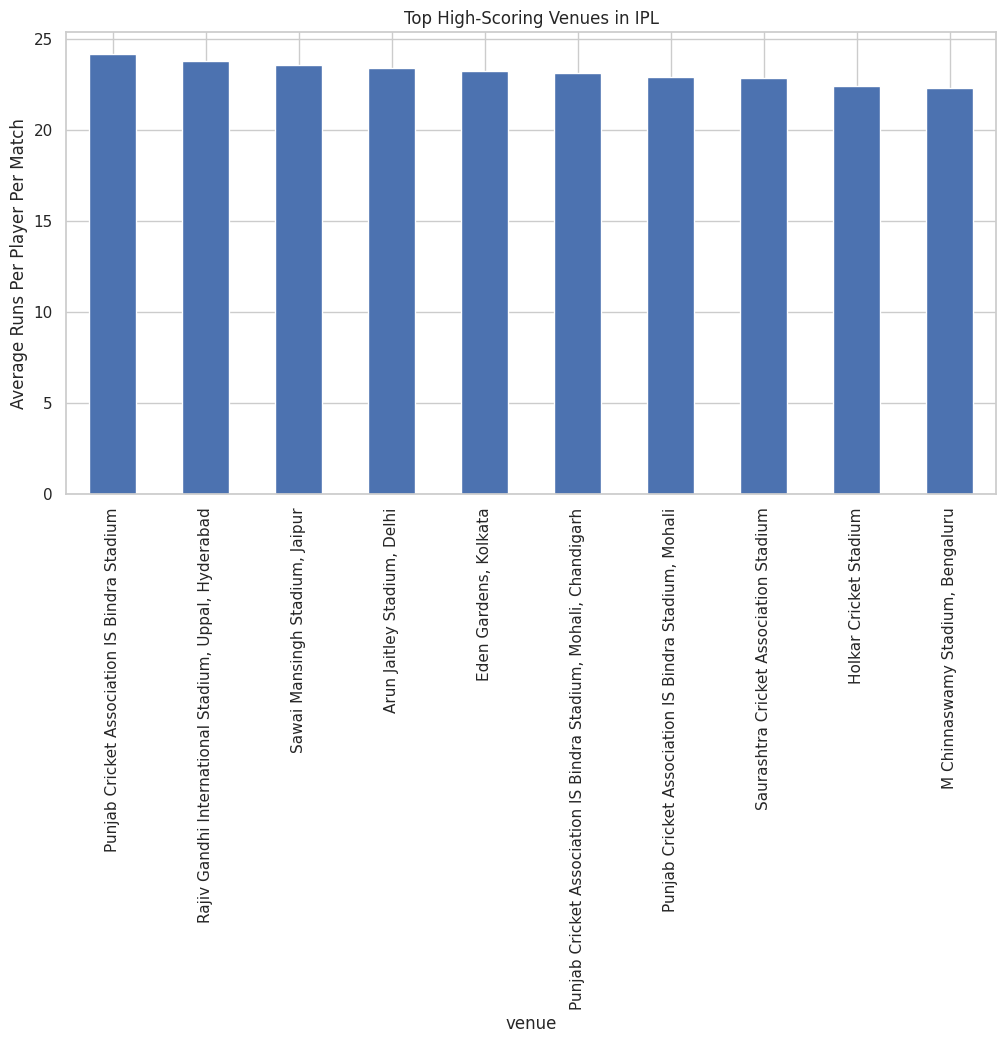

In [ ]:
venue_stats = batting_df.groupby('venue')['runs_in_match'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
venue_stats.plot(kind='bar')
plt.title("Top High-Scoring Venues in IPL")
plt.ylabel("Average Runs Per Player Per Match")
plt.show()


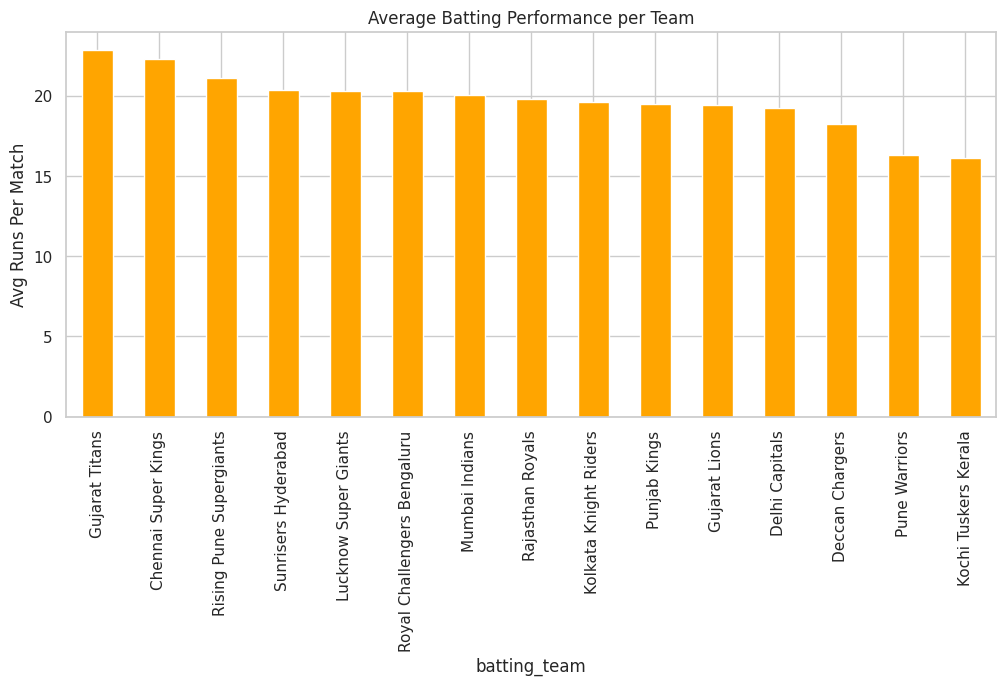

In [ ]:
team_runs = batting_df.groupby('batting_team')['runs_in_match'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
team_runs.plot(kind='bar', color='orange')
plt.title("Average Batting Performance per Team")
plt.ylabel("Avg Runs Per Match")
plt.show()


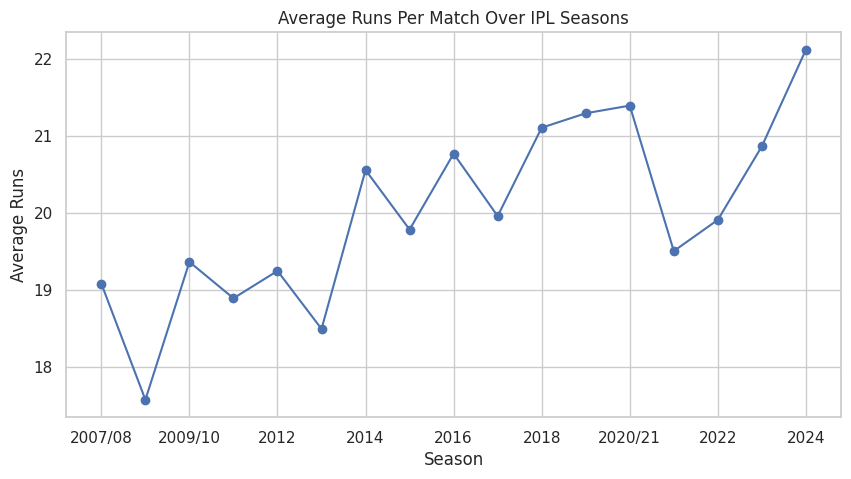

In [ ]:
season_trend = batting_df.groupby('season')['runs_in_match'].mean()

season_trend.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Average Runs Per Match Over IPL Seasons")
plt.xlabel("Season")
plt.ylabel("Average Runs")
plt.show()
